Para analizar sensibilidad hay que ir modificando los parametros uno a uno. Hay que ir viendo los rangos y proponer distintos paranetros dentro del rango. E1, E2 y E3 las consideramos 0 porque no vamos a considerar ruido.

$$S=\frac{(R_a - R_n)/R_n}{(P_a - P_a)/P_n}$$

In [2]:
datasets = [f"dataset{i}.csv" for i in range(1, 21)]

In [3]:
datasets

['dataset1.csv',
 'dataset2.csv',
 'dataset3.csv',
 'dataset4.csv',
 'dataset5.csv',
 'dataset6.csv',
 'dataset7.csv',
 'dataset8.csv',
 'dataset9.csv',
 'dataset10.csv',
 'dataset11.csv',
 'dataset12.csv',
 'dataset13.csv',
 'dataset14.csv',
 'dataset15.csv',
 'dataset16.csv',
 'dataset17.csv',
 'dataset18.csv',
 'dataset19.csv',
 'dataset20.csv']

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df_total = pd.DataFrame({"Larvas":[],
					"Pupas":[],
					"Adultos":[],
					"Medicion":[]})

mediciones = {}
for dataset in datasets:
	df = pd.read_csv(f"data/{dataset}", names=["Larvas", "Pupas", "Adultos"])
	
	df["Medicion"] = range(1, len(df["Larvas"])+1)
	df_total = pd.concat([df_total, df])

df_means = df_total.groupby("Medicion")[["Larvas", "Pupas", "Adultos"]].mean().reset_index()

/home/justo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


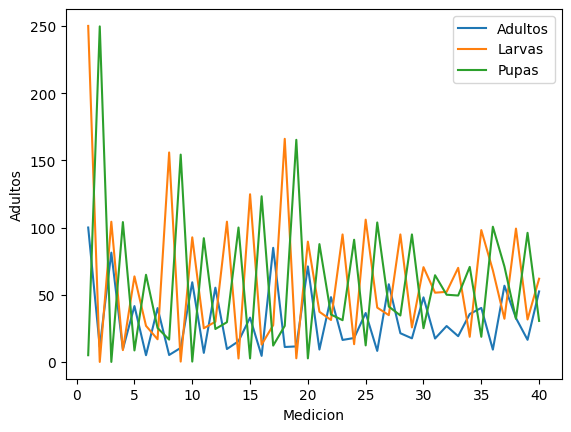

In [5]:
sns.lineplot(df_means, x="Medicion", y="Adultos", label="Adultos")
sns.lineplot(df_means, x="Medicion", y="Larvas", label="Larvas")
sns.lineplot(df_means, x="Medicion", y="Pupas", label="Pupas")

plt.legend()
plt.show()

In [6]:
def Ln(An_a, Ln_a):
	return b * An_a * np.exp(-1 * c_el * Ln_a - c_ea * An_a)

def Pn(Ln_a):
	return (1 - mu_l) * Ln_a 

def An(An_a, Pn_a):
	return (Pn_a * np.exp(-1 * c_pa * An_a) + (1-mu_a)*An_a)


ts = np.arange(1, 40, 1)

Ln_0 = 250
Pn_0 = 5
An_0 = 100

Lns = [Ln_0]
Pns = [Pn_0]
Ans = [An_0]

conjuntos = [
	{"b":3.75,
  	"mu_l":0.125,
	"mu_a":0.5,
	"c_el":3.12*(10**-3),
	"c_ea":6.82*(10**-3),
	"c_pa":6.25*(10**-3)},

	{"b":9.882,
  	"mu_l":1.56*(10**-2),
	"mu_a":0.8867,
	"c_el":3.95*(10**-2),
	"c_ea":6.3*(10**-3),
	"c_pa":0.1016},

	{"b":9.59,
  	"mu_l":9.77*(10**-3),
	"mu_a":0.88,
	"c_el":3.82*(10**-2),
	"c_ea":6.24*(10**-3),
	"c_pa":9.59*(10**-2)}
]

count = 1

Lnss = []
Anss = []
Pnss = []
for conjunto in conjuntos:
	Lns = [Ln_0]
	Pns = [Pn_0]
	Ans = [An_0]
	b = conjunto["b"]
	mu_l = conjunto["mu_l"]
	mu_a = conjunto["mu_a"]
	c_el = conjunto["c_el"]
	c_ea = conjunto["c_ea"]
	c_pa = conjunto["c_pa"]

	for t in ts[1:]:
		Ant = Ans[-1]
		Lnt = Lns[-1]
		Pnt = Pns[-1] 
		Lns.append(Ln(Ant, Lnt))
		Pns.append(Pn(Lnt))
		Ans.append(An(Ant, Pnt))

	Lnss.append(Lns)
	Anss.append(Ans)
	Pnss.append(Pns)


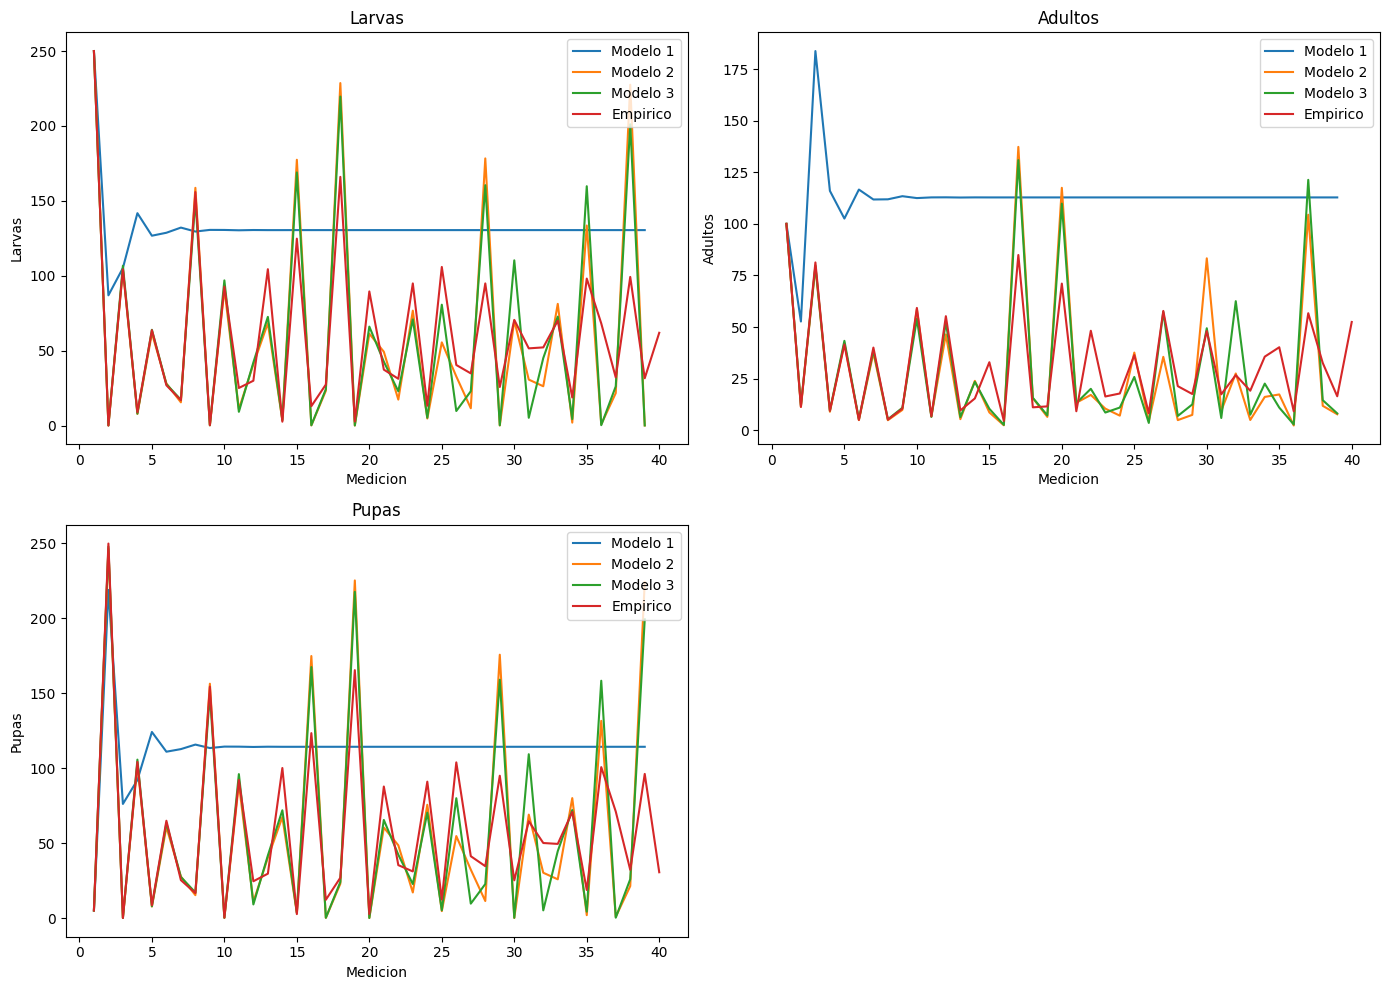

In [7]:
plt.figure(figsize=(14, 10))
plt.subplot(221)
plt.title("Larvas")
count = 1
for i in Lnss:
	plt.plot(ts, i, label=f"Modelo {count}")
	count += 1
sns.lineplot(df_means, x="Medicion", y="Larvas", label="Empirico")


plt.subplot(222)
plt.title("Adultos")
count = 1
for i in Anss:
	plt.plot(ts, i, label=f"Modelo {count}")
	count += 1
sns.lineplot(df_means, x="Medicion", y="Adultos", label="Empirico")

plt.subplot(223)
plt.title("Pupas")
count = 1
for i in Pnss:
	plt.plot(ts, i, label=f"Modelo {count}")
	count += 1
sns.lineplot(df_means, x="Medicion", y="Pupas", label="Empirico")

plt.tight_layout()

In [8]:
errores_modelos = {
	"Modelo 1":None,
	"Modelo 2":None,
	"Modelo 3":None
}

errores = []
modelos = []
tipo = []

for i, j, k, mode in zip(Lnss, Anss, Pnss, range(len(Lnss))):
	error_larvas = 0
	for L_c, L_e in zip(i, df_means["Larvas"]):
		error_larvas += np.abs(L_e - L_c)

	error_adultos = 0
	for A_c, A_e in zip(j, df_means["Adultos"]):
		error_adultos += np.abs(A_e - A_c)

	error_pupas = 0
	for P_c, P_e in zip(k, df_means["Pupas"]):
		error_pupas += np.abs(P_e - P_c)

	errores_modelos[f"Modelo {mode+1}"] = {
		"Error larvas":error_larvas,
		"Error adultos":error_adultos,
		"Error pupas":error_pupas
	}

	errores.append(error_larvas)
	tipo.append("Larvas")
	errores.append(error_pupas)
	tipo.append("Pupas")
	errores.append(error_adultos)
	tipo.append("Adultos")
	modelos.append(f"Modelo {mode+1}")
	modelos.append(f"Modelo {mode+1}")
	modelos.append(f"Modelo {mode+1}")


for key in errores_modelos.keys():
	print(f"{key}:\n{errores_modelos[key]}")

Modelo 1:
{'Error larvas': 2894.600030272321, 'Error adultos': 3191.005419619269, 'Error pupas': 2364.088227410815}
Modelo 2:
{'Error larvas': 826.949177910459, 'Error adultos': 454.4340465456679, 'Error pupas': 784.7674841953044}
Modelo 3:
{'Error larvas': 798.5868635782532, 'Error adultos': 426.20229812333815, 'Error pupas': 757.4815464145777}


In [9]:
print(len(errores))
print(len(tipo))
print(len(modelos))

9
9
9


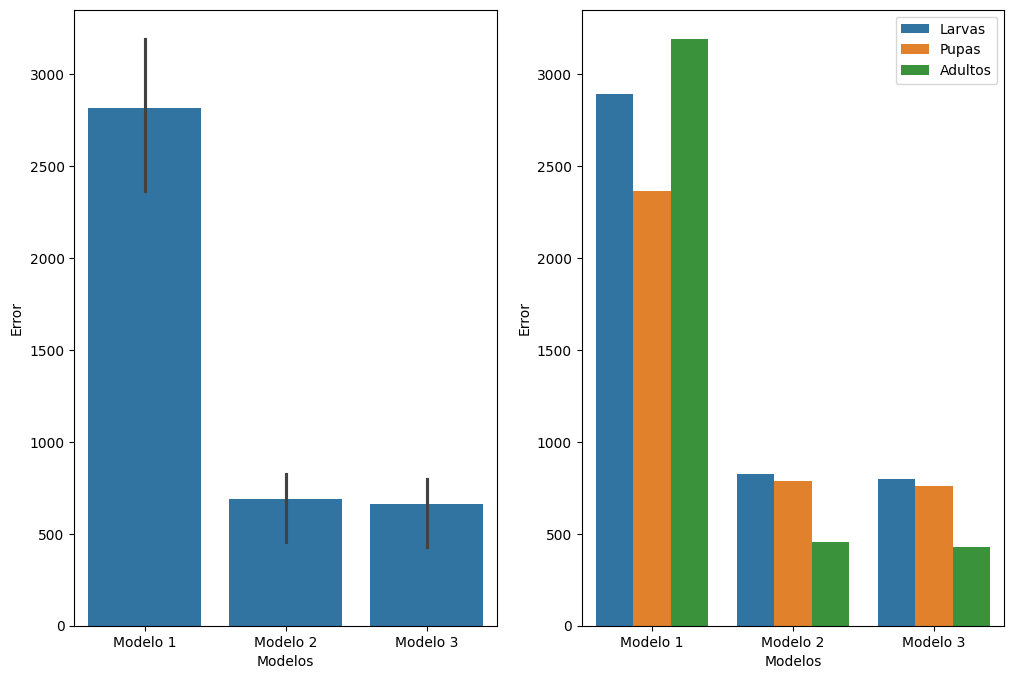

In [10]:
df_aux = pd.DataFrame({
	"Error":errores,
	"Tipo":tipo,
	"Modelos":modelos
})

plt.figure(figsize=(12,8))
plt.subplot(121)
sns.barplot(df_aux, x="Modelos", y="Error")


plt.subplot(122)
sns.barplot(df_aux, x="Modelos", y="Error", hue="Tipo")
plt.legend()
plt.show()

In [11]:
bs = np.linspace(0, 15, 5)
mu_ls = np.linspace(0, 1, 5)
mu_as = np.linspace(0, 1, 5)
c_els = np.linspace(0, 0.1, 5)
c_eas = np.linspace(0, 0.1, 5)
c_pas = np.linspace(0, 1, 5)

In [12]:
def calc_sensibilidad(Ra, Rn, Pa, Pn):
	sumatoria = 0.0
	for i, j in zip(Ra, Rn):
		try:
			sumatoria += ((float(i)-float(j))/float(j))/((float(Pa)-float(Pn))/float(Pn))
		except ZeroDivisionError:
			sumatoria += 0

	return sumatoria

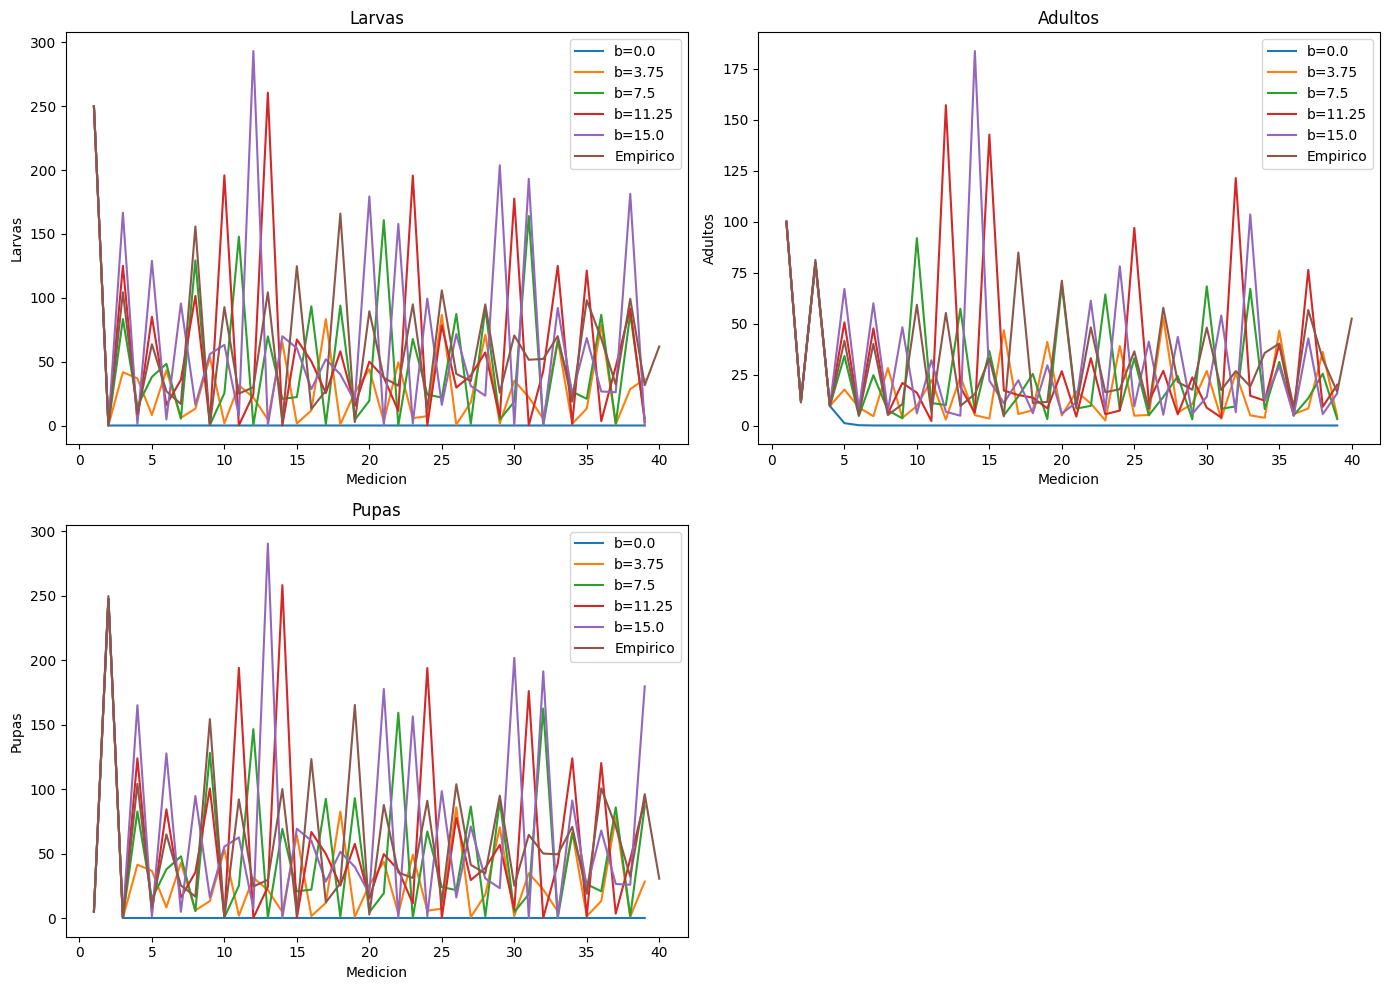

In [13]:
modelo_3 = {
	"b":9.59,
  	"mu_l":9.77*(10**-3),
	"mu_a":0.88,
	"c_el":3.82*(10**-2),
	"c_ea":6.24*(10**-3),
	"c_pa":9.59*(10**-2)
	}

plt.figure(figsize=(14, 10))

sensibilidades_b = {}
for b_i in bs:
	Lns = [Ln_0]
	Pns = [Pn_0]
	Ans = [An_0]
	b = b_i
	mu_l = conjunto["mu_l"]
	mu_a = conjunto["mu_a"]
	c_el = conjunto["c_el"]
	c_ea = conjunto["c_ea"]
	c_pa = conjunto["c_pa"]

	for t in ts[1:]:
		Ant = Ans[-1]
		Lnt = Lns[-1]
		Pnt = Pns[-1] 
		Lns.append(Ln(Ant, Lnt))
		Pns.append(Pn(Lnt))
		Ans.append(An(Ant, Pnt))

	
	plt.subplot(221)
	plt.title("Larvas")
	plt.plot(ts, Lns, label=f"b={b_i}")


	plt.subplot(222)
	plt.title("Adultos")
	plt.plot(ts, Ans, label=f"b={b_i}")

	plt.subplot(223)
	plt.title("Pupas")
	plt.plot(ts, Pns, label=f"b={b_i}")

	sensibilidades_b[f"{b}"] = {
		"Adulto":calc_sensibilidad(Ans, Anss[-1], b_i, modelo_3["b"]),
		"Larva":calc_sensibilidad(Lns, Lnss[-1], b_i, modelo_3["b"]),
		"Pupas":calc_sensibilidad(Pns, Pnss[-1], b_i, modelo_3["b"])
	}


plt.subplot(221)
sns.lineplot(df_means, x="Medicion", y="Larvas", label="Empirico")


plt.subplot(222)
sns.lineplot(df_means, x="Medicion", y="Adultos", label="Empirico")

plt.subplot(223)
sns.lineplot(df_means, x="Medicion", y="Pupas", label="Empirico")
plt.tight_layout()

plt.show()

In [14]:
import json
print(json.dumps(sensibilidades_b, indent=4))

{
    "0.0": {
        "Adulto": 34.94675977454073,
        "Larva": 38.0,
        "Pupas": 37.0
    },
    "3.75": {
        "Adulto": -44.10902783039751,
        "Larva": -3714.8066427448034,
        "Pupas": -2700.412889720099
    },
    "7.5": {
        "Adulto": -116.07621125712431,
        "Larva": -6240.5106848277255,
        "Pupas": -5797.039354813835
    },
    "11.25": {
        "Adulto": 167.87419494401814,
        "Larva": 5514.516351747136,
        "Pupas": 5231.408844265437
    },
    "15.0": {
        "Adulto": 109.81326413844035,
        "Larva": 5045.329225508189,
        "Pupas": 5044.725728854921
    }
}


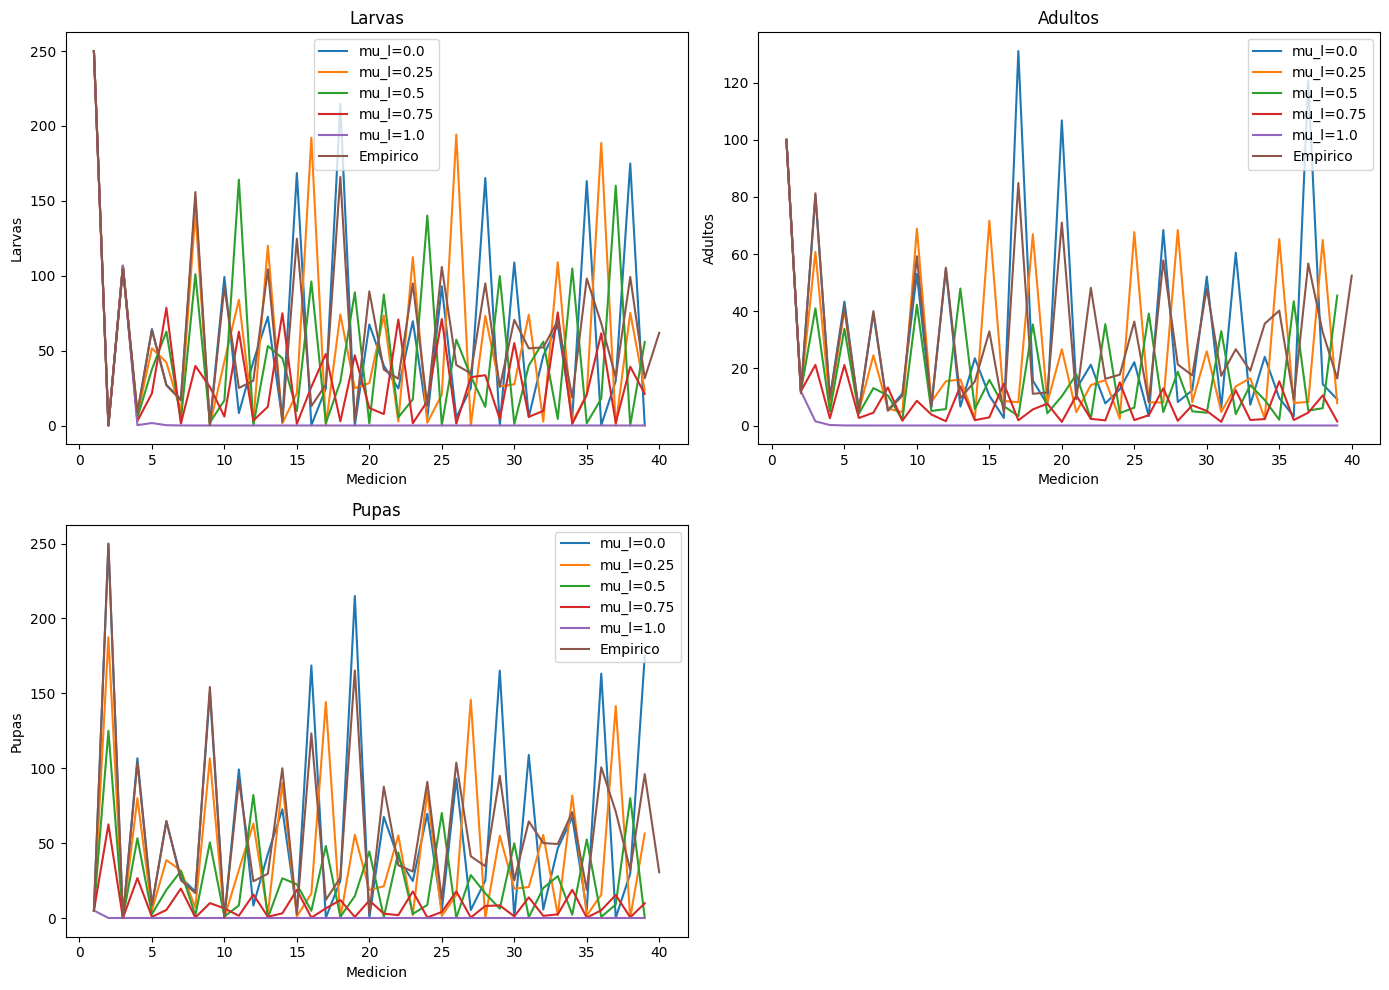

In [15]:
plt.figure(figsize=(14, 10))

sensibilidades_mu = {}
for mu_ls_i in mu_ls:
	Lns = [Ln_0]
	Pns = [Pn_0]
	Ans = [An_0]
	b = conjunto["b"]
	mu_l = mu_ls_i
	mu_a = conjunto["mu_a"]
	c_el = conjunto["c_el"]
	c_ea = conjunto["c_ea"]
	c_pa = conjunto["c_pa"]

	for t in ts[1:]:
		Ant = Ans[-1]
		Lnt = Lns[-1]
		Pnt = Pns[-1] 
		Lns.append(Ln(Ant, Lnt))
		Pns.append(Pn(Lnt))
		Ans.append(An(Ant, Pnt))

	
	plt.subplot(221)
	plt.title("Larvas")
	plt.plot(ts, Lns, label=f"mu_l={mu_ls_i}")


	plt.subplot(222)
	plt.title("Adultos")
	plt.plot(ts, Ans, label=f"mu_l={mu_ls_i}")

	plt.subplot(223)
	plt.title("Pupas")
	plt.plot(ts, Pns, label=f"mu_l={mu_ls_i}")

	sensibilidades_mu[f"{mu_ls_i}"] = {
	"Adulto":calc_sensibilidad(Ans, Anss[-1], mu_ls_i, modelo_3["mu_l"]),
	"Larva":calc_sensibilidad(Lns, Lnss[-1], mu_ls_i, modelo_3["mu_l"]),
	"Pupas":calc_sensibilidad(Pns, Pnss[-1], mu_ls_i, modelo_3["mu_l"])
	}


plt.subplot(221)
sns.lineplot(df_means, x="Medicion", y="Larvas", label="Empirico")


plt.subplot(222)
sns.lineplot(df_means, x="Medicion", y="Adultos", label="Empirico")

plt.subplot(223)
sns.lineplot(df_means, x="Medicion", y="Pupas", label="Empirico")
plt.tight_layout()

plt.show()

In [16]:
print(json.dumps(sensibilidades_mu, indent=4))

{
    "0.0": {
        "Adulto": -0.6258957492987913,
        "Larva": -1.7451355034352793,
        "Pupas": -0.41567430320506815
    },
    "0.25": {
        "Adulto": 1.0905425397684696,
        "Larva": 145.6375795615873,
        "Pupas": 97.65691496542073
    },
    "0.5": {
        "Adulto": 0.6979014186794783,
        "Larva": 106.775534593278,
        "Pupas": 43.996951937207626
    },
    "0.75": {
        "Adulto": -0.1818045126477682,
        "Larva": 33.44342994683349,
        "Pupas": 6.874101389843183
    },
    "1.0": {
        "Adulto": -0.3646908526768509,
        "Larva": -0.35454400486387216,
        "Pupas": -0.3749229976874063
    }
}


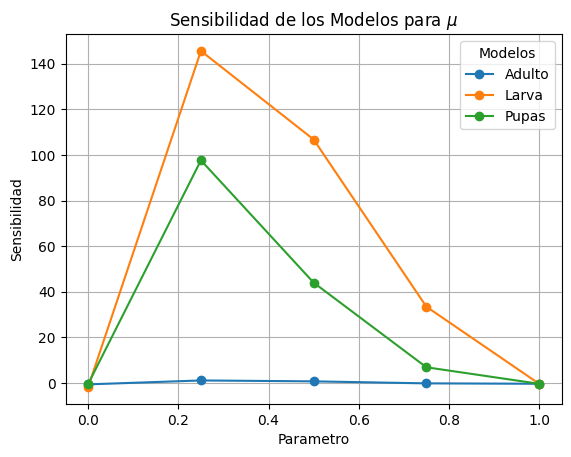

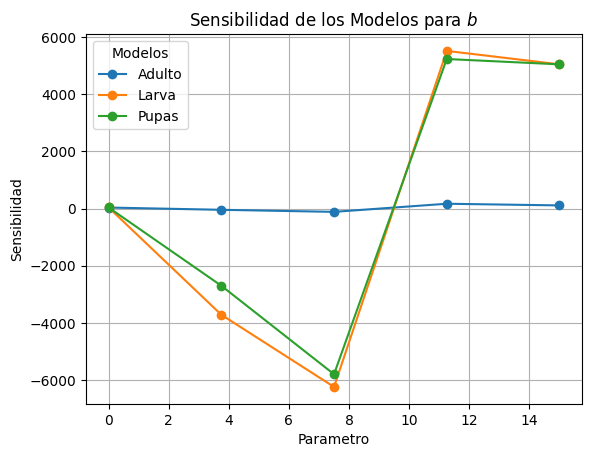

In [29]:
df_mu = pd.DataFrame(sensibilidades_mu).transpose()
df_b = pd.DataFrame(sensibilidades_b).transpose()

df_mu.index = df_mu.index.astype(float)
df_b.index = df_b.index.astype(float)

df_mu.plot(kind='line', marker='o')
plt.xlabel('Parametro')
plt.ylabel('Sensibilidad')
plt.title(r'Sensibilidad de los Modelos para $\mu$')
plt.legend(title='Modelos')
plt.grid(True)
plt.show()

#-------------------------
df_b.plot(kind='line', marker='o')
plt.xlabel('Parametro')
plt.ylabel('Sensibilidad')
plt.title(r'Sensibilidad de los Modelos para $b$')
plt.legend(title='Modelos')
plt.grid(True)
plt.show()

# Análisis de sensibilidad
Decidimos hacer análisis de sensibilidad para dos parámetros:
- $b$
- $\mu$

## Parámetros
### $b$
Podemos ver que es muy sensible a este parámetro. Cuando variamos el valor dentro del rango esperado la sensibilidad se dispara a valores muy altos para las larvas y pupas, siendo relativamente bajo en adultos.

Otro aspecto importante es que esta sensibilidad calculada tiene valores altos positivos y negativos, por lo que podemos afirmar que depende el valor de b podemos estar afectando la variable de respuesta en diferentes formas.

### $\mu$
A partir de la gráfica y los datos calculados podemos ver que al igual que con $\mu$ la sensibilidad para la ecuación de adultos es casi nula mientras que diverge más para larvas y pupas. Por otro lado, podemos ver que a comparación de la sensibilidad de $b$ es muy baja y toma solamente valores positivos.


----------
## Conclusión
Podemos concluir que es más sensible a la variación de $b$